In [1]:
import numpy as np
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [2]:
# Functions for simulation:

def inc(Xi, L):

    """Increment according to PBCs."""

    Xi = 0 if Xi == L - 1 else Xi + 1
    return Xi

def dec(Xi, L): 
    
    """Decrement according to PBCs."""

    Xi = L - 1 if Xi == 0 else Xi - 1
    return Xi

def random_X_and_Y(L):
    
    """Chooses a random X and a random nearest neighbor Y."""

    X = np.array([np.int(L*np.random.random()), np.int(L*np.random.random())]) # position of X site
    Y = np.copy(X) # position of Y site (starts as X)
    
    idir = np.int(4*np.random.random()) # choose direction to shift Y randomly
    
    # edit Y accordingly
    if idir == 0:
        Y[0] = inc(Y[0], L) # pos x-dir
    if idir == 1:
        Y[0] = dec(Y[0], L) # neg x-dir
    if idir == 2:
        Y[1] = inc(Y[1], L) # pos y-dir
    if idir == 3:
        Y[1] = dec(Y[1], L) # neg y-dir

    return X, Y

def N_coop(s, X, L):
    
    """Counts the number of neighbors of X that are cooperating."""

    Nc = 0 # number of cooperators in neighborhood
    Nc += s[inc(X[0], L), X[1]]
    Nc += s[dec(X[0], L), X[1]]
    Nc += s[X[0], inc(X[1], L)]
    Nc += s[X[0], dec(X[1], L)]
    
    return Nc



def payoff(sX, NcX, b):
    
    """Gives payoff as a function of state at X and states of its nearest neighbors."""

    if sX: # X a cooperator
        return NcX + 1
    else: # X a defector
        return NcX*b

def precalc_W_array(b, K):
    
    """Precalculates W values to save computations during simulation."""

    W_arr = np.zeros([2, 2, 5, 5])
    
    for sX in range(2):
        for sY in range(2):
            for NcX in range(5):
                EX = payoff(sX, NcX, b)
                for NcY in range(5):
                    EY = payoff(sY, NcY, b)
                    W_arr[sX,sY,NcX,NcY] = 1 / (1 + np.exp((EX - EY) / K))
    
    return W_arr


In [3]:
b = 1.8472 # payoff for defection against cooperator in single game (should be > 1)
K = 0.1 # temperature

W_arr = precalc_W_array(b, K) # precalculate W values for all possibilities (np.exp() is expensive!)

<IPython.core.display.Javascript object>


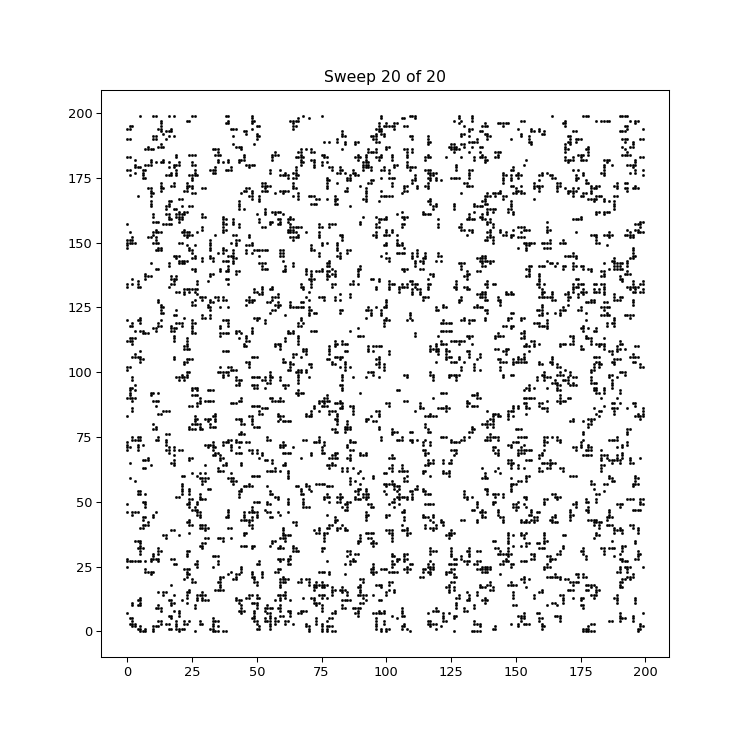

In [4]:
L = 200 # side length
sweeplen = L*L # number of steps in a sweep (set to number of lattice sites)
Nsweeps = 20 # number of sweeps

# Set up plot:
plt.ion()
fig, ax = plt.subplots(1, figsize=[8, 8])
fig.canvas.draw()
ax.set_aspect('equal', 'box')

s = np.random.choice(a=[False, True], size=(L, L), p=[0.5, 0.5]) # state array

for sweep in range(Nsweeps):

    #print('\rSweep {} of {}'.format(sweep+1, Nsweeps), end='')

    for i in range(sweeplen): 
        X, Y = random_X_and_Y(L) # positions of X and Y
        sX, sY = s[X[0], X[1]], s[Y[0], Y[1]] # states at X and Y

        if not sX == sY: # if they are identical there can be no change

            NcX, NcY = N_coop(s, X, L), N_coop(s, Y, L) # get numbers of cooperators next to X and Y
            W = W_arr[np.int(sX), np.int(sY), NcX, NcY] # get prob from saved array
            if np.random.random() <= W: # do with prob W
                s[X[0], X[1]] = sY # flip sX

    # Plot cooperators for this sweep:

    cX, cY = np.where(s) # get the X and Y data in a plottable form
    
    ax.cla() # clear previous data
    ax.plot(cX, cY, linestyle='', marker='s', markersize=1, color='black')
    
    ax.set_title('Sweep {} of {}'.format(sweep+1, Nsweeps))

    fig.show()
    fig.canvas.draw()
